In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from matplotlib.pyplot import figure
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import SmoothBivariateSpline
import csv

In [21]:
df = pd.read_csv('/Users/pavelzhelnin/Documents/physics/TAMBO/ColcaValleyData.txt', delimiter = "\t") 
#print(df)

     type   latitude  longitude  altitude (m)                         name
0       T -15.739750 -72.336237        3905.0  Colca_Valley_Longs_and_Lats
1       T -15.736416 -72.332200        3779.1                          NaN
2       T -15.736416 -72.328163        3816.0                          NaN
3       T -15.736416 -72.324127        3856.3                          NaN
4       T -15.736416 -72.320090        3876.8                          NaN
...   ...        ...        ...           ...                          ...
9797    T -15.409632 -71.952750        4762.4                          NaN
9798    T -15.409632 -71.948713        4909.1                          NaN
9799    T -15.409632 -71.944676        4984.2                          NaN
9800    T -15.409632 -71.940640        4958.5                          NaN
9801    T -15.409632 -71.936603        5024.4                          NaN

[9802 rows x 5 columns]


In [22]:
Lat = df.iloc[0:, 1]
Long = df.iloc[0:, 2]
Elev = df.iloc[0:, 3]

pts=1000000
longs= np.arange(np.min(Long),np.max(Long),(-np.min(Long)+np.max(Long))/np.sqrt(pts))
lats = np.arange(np.min(Lat),np.max(Lat),(-np.min(Lat)+np.max(Lat))/np.sqrt(pts))
elevs = np.arange(np.min(Elev),np.max(Elev),(-np.min(Elev)+np.max(Elev))/np.sqrt(pts))
x,y = np.meshgrid(longs,lats);
z = griddata((Long, Lat), Elev, (x, y), method='cubic');
#print(z)
x = np.matrix.flatten(np.asmatrix(x)); #Gridded longitude
y = np.matrix.flatten(np.asmatrix(y)); #Gridded latitude
z = np.matrix.flatten(np.asmatrix(z)); #Gridded elevation


In [23]:
x = [coords_to_meters(g,i) for i,g in zip(Lat,Long)]

In [24]:
#print(x)

Meters_Lats = [x[i][1] for i,c in enumerate(x)]
Meters_Longs = [x[i][0] for i,c in enumerate(x)]
#print(Meters_Lats)

In [25]:
meters_elevations = SmoothBivariateSpline(Meters_Longs,Meters_Lats,Elev,kx=3,ky=3)

1000
1000
1001


/Users/pavelzhelnin/anaconda3/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:1168: UserWarning: 
The required storage space exceeds the available storage space: nxest
or nyest too small, or s too small.
The weighted least-squares spline corresponds to the current set of
knots.
  warnings.warn(message)


ValueError: x and y must be the same size

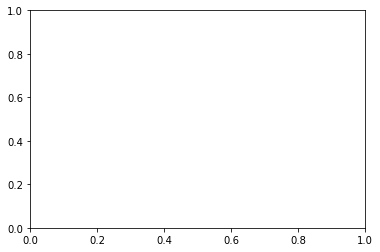

In [26]:
plt.scatter([x],[y],1,[z],cmap = 'terrain')
plt.colorbar(label='Elevation above sea level [m]')
plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 12)

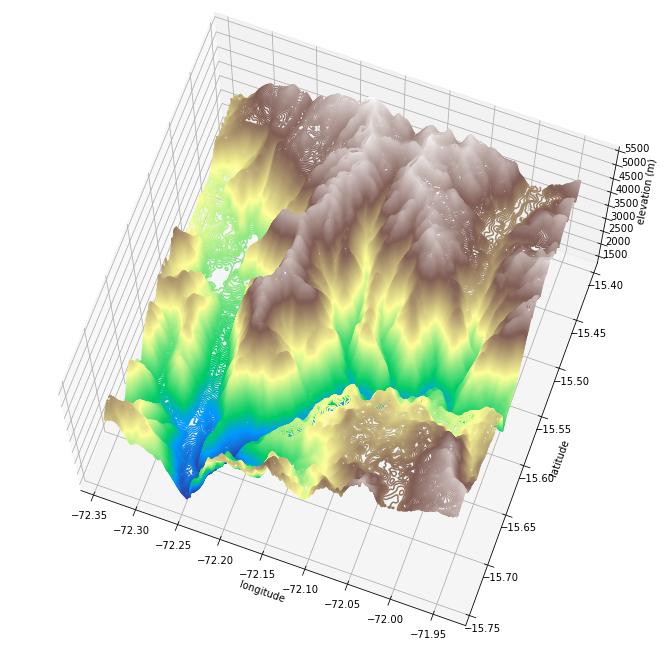

In [27]:
from matplotlib import figure
#fig = plt.figure(figsize=(3,3))

ax = plt.axes(projection='3d')
x,y = np.meshgrid(longs,lats);
g = griddata((Long, Lat), Elev, (x, y), method='cubic');
g_del = np.delete(g,np.s_[1:11],1);
g_gel = np.delete(g_del,np.s_[990:1000],1);
y_del = np.delete(y,np.s_[990:1000],1);
x_del = np.delete(x,np.s_[990:1000],1);
#print(g)
ax.contour3D(x_del[10:990],y_del[10:990],g_del[10:990], 400, cmap='terrain')
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_zlabel("elevation (m)")
ax.view_init(70, 290)

plt.gcf().set_size_inches(12, 12)
#plt.savefig("ContourColcaFromAbove", bbox_inches='tight')
    

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x,y = np.meshgrid(longs,lats);
g = griddata((Long, Lat), Elev, (x, y), method='cubic');
ax.contour3D(x,y,g, 100, cmap='terrain')
ax.view_init(30, 180)
plt.show()

In [28]:
#Build something that defines rock and something that defines air 
#Define a trajectory through which you go through the geometry that you have 
#Have something that tells you if it is in rock or in air 
#Have a thing that defines a path/track and knows what objects are in that path 
#For each initial and final 
#include density of air too 
#Spline rock surface/mountain surface - do a fancy interpolation between points, you return a continous function for what used 
#to be an array. Just call the spline object. 
#an object you can call that will return a value for you at any point 
#Start with univariate spline, define a box that you want to focus and pick a slice and then see what the looks like 

#Base Coordinates: 
x_min = min(Long)
y_min = min(Lat)
z_min = min(Elev)
x_max = max(Long)
y_max = max(Lat)
z_max = max(Elev)

In [ ]:
#Thoughts: a line will intersect a plane but we only want one of four planes so 
#Thoughts 10/13 - Establish an origin (min,min,min)
# - Create an equation for a line everytime a point/theta/phi are given 
# theta = arctan(y/x), phi = arctan(z/r), normalize these values for the direction 
# find code that can find the intersections
# theta = due east? = 0 degrees and the horizontal is 0 degrees for phi 
# 

In [29]:
# x = longitude (decimal point notation)
# y = latitude 
# z = elevation (m)
# phi = can go from 0 to 180 degrees indicates angle of descension vs. ascension 
# theta = can go from 0 to 360 degrees indicates angle in x-y plane (due east = 0 degrees )

def get_line_eq(x,y,z,phi,theta): 
    #problem convert x and y to meters from decimal point form 
    #assuming this is done 
    
    theta = theta * np.pi/180
    phi = phi * np.pi/180 
    
    x_direct = np.cos(theta)*np.sin(phi)
    y_direct = np.sin(theta)*np.sin(phi)
    z_direct = np.cos(phi)
    
    meters = coords_to_meters(x,y)
    
    data = [meters[0],meters[1],z,x_direct,y_direct,z_direct]
    data = np.array(data, dtype=np.float32)
    data = np.around(data,3)
    return data
    

In [30]:
def coords_to_meters(longitude,latitude): 
    
    longitude = longitude * (np.pi/180)
    latitude = latitude * (np.pi/180) 

    latmin = np.min(Lat)* np.pi/180
    longmin = np.min(Long) * np.pi/180
    
    latMid = (latitude + latmin)/2.0

    m_per_deg_lat = 111132.954 - (559.822 * np.cos( 2.0 * latMid )) + (1.175 * np.cos( 4.0 * latMid)) + (0.0023 * np.cos( 6.0 * latMid));
    m_per_deg_lon = (111412.82 * np.cos(latMid)) - (93.5*np.cos(latMid*3)) + (0.118*np.cos(5*latMid));
    
    delta_lat = latitude - latmin 
    delta_long = longitude - longmin 
    
    x = delta_long * m_per_deg_lon 
    y = delta_lat * m_per_deg_lat 
    #array = [x,y]
    #array = np.array(array,dtype = np.float32)
    array = np.around(np.array([x,y],dtype =np.float32),3)
    
    return array

In [47]:
 def find_end_points(alpha):
    
    meters = coords_to_meters(np.max(Long),np.max(Lat))
    
    x_min = 0.0
    x_max = meters[0]
    y_min = 0.0
    y_max = meters[1]
    z_min = np.min(Elev)
    z_max = np.max(Elev)
    array = [x_min,x_max,y_min,y_max,z_min,z_max]
    array = np.array(array,dtype = np.float32)
    array = np.around(array,3)
    start_pts1 = [alpha[0],alpha[1],alpha[2]]
    start_pts1 = np.array(start_pts1, dtype = np.float32)
    start_pts1 = np.around(start_pts1,3)
    start_pts = [alpha[0],alpha[0],alpha[1],alpha[1],alpha[2],alpha[2]]
    start_pts = np.array(start_pts,dtype = np.float32)
    start_pts = np.around(start_pts,3)
    direct_pts = [alpha[3],alpha[3],alpha[4],alpha[4],alpha[5],alpha[5]]
    direct_pts = np.array(direct_pts,dtype = np.float32)
    direct_pts = np.around(direct_pts,3)
    
    for count,g in enumerate(array):
        
        flag = False
        
        if direct_pts[count] == 0: 
            continue       
        
        t = (g - start_pts[count])/direct_pts[count]
        
        if t < 0 or t == 0:  
            continue
        potential_endps = [alpha[0]+(t*alpha[3]),alpha[1]+(t*alpha[4]),alpha[2]+(t*alpha[5])]
        potential_endps = np.array(potential_endps,dtype = np.float32)
        potential_endps = np.around(potential_endps,3)
        
        for c,z in enumerate(potential_endps): 

            if z < array[2*c] or z > array[2*c+1]:
                flag = True 
                break 
                
        if flag == False: 
    
            data = np.array(potential_endps, dtype=np.float32)
            data = np.around(data,3)
            endps = np.subtract(data,start_pts1)
            enpds = np.around(endps,3)
            return start_pts1,endps
    

In [31]:
from scipy.integrate import quad

def get_column_depth (t,array):
    
    #array = beginning x,y,z and endpoint x,y,z 
    
    density_of_rock =  5520 #"kg/m^3"
    density_of_air = 1225 #"kg/m^3" 
    z = array[0][2] + (t * array[1][2])
    y = array[0][1] + (t * array[1][1])
    x = array[0][0] + (t * array[1][0])
    
    dzdt = array[1][2]
    dydt = array[1][1]
    dxdt = array[1][0]
    
    if z <= meters_elevations.ev(x,y): 
        return density_of_rock * np.sqrt(1+ dzdt**2 + dydt**2 + dxdt**2)
    if z > meters_elevations.ev(x,y): 
        return density_of_air * np.sqrt(1+ dzdt**2 + dydt**2 + dxdt**2)
    

In [ ]:
d = get_line_eq(np.min(Long),np.min(Lat),4000,90.0,90.0)
print(d)
print(find_end_points(d))

g = find_end_points(d)
f = get_column_depth(t,g)
density_of_rock =  5520 #kg/m^3
density_of_air = 1225 #kg/m^3
dzdt = g[1][2]
dydt = g[1][1]
dxdt = g[1][0]
I = quad(lambda t: get_column_depth(t, g), 0, 1)# args=(dzdt,dydt,dxdt,density_of_rock,density_of_air)) 
I

In [40]:
    alpha = get_line_eq(-72.0547,-15.60805,2829,90,137)
    print(alpha)
    print(find_end_points(alpha))

    meters = coords_to_meters(np.max(Long),np.max(Lat))
    
    x_min = 0.0
    x_max = meters[0]
    y_min = 0.0
    y_max = meters[1]
    z_min = np.min(Elev)
    z_max = np.max(Elev)
    array = [x_min,x_max,y_min,y_max,z_min,z_max]
    #print(array)
    array = np.array(array,dtype = np.float32)
    array = np.around(array,3)
    #print(array)
    start_pts1 = [alpha[0],alpha[1],alpha[2]]
    start_pts1 = np.array(start_pts1, dtype = np.float32)
    start_pts1 = np.around(start_pts1,3)
    start_pts = [alpha[0],alpha[0],alpha[1],alpha[1],alpha[2],alpha[2]]
    start_pts = np.array(start_pts,dtype = np.float32)
    start_pts = np.around(start_pts,3)
    direct_pts = [alpha[3],alpha[3],alpha[4],alpha[4],alpha[5],alpha[5]]
    direct_pts = np.array(direct_pts,dtype = np.float32)
    direct_pts = np.around(direct_pts,3)
    
    for count,g in enumerate(array):
        
        flag = False
        
        #print("hi")
        if direct_pts[count] == 0: 
            continue       
        
        t = (g - start_pts[count])/direct_pts[count]
        
        if t < 0 or t == 0:  
            continue
        potential_endps = [alpha[0]+(t*alpha[3]),alpha[1]+(t*alpha[4]),alpha[2]+(t*alpha[5])]
        potential_endps = np.array(potential_endps,dtype =np.float32)
        potential_endps = np.around(potential_endps,3)
        #print(potential_endps)
        for c,z in enumerate(potential_endps): 
            if z < array[2*c] or z > array[2*c+1]:
                flag = True 
                break 
                
        if flag == False: 
            print("hi")
            data = np.array(potential_endps, dtype=np.float32)
            data = np.around(data,3)
            endps = np.subtract(data,start_pts1)
            endps = np.around(endps,3)
            #return(start_pts1,endps)
            print(start_pts1,endps)

[ 5.26784e+02  2.54352e+02  2.82900e+03 -7.31000e-01  6.82000e-01
  0.00000e+00]
None
hi
[ 526.784  254.352 2829.   ] [-410.732  383.2      0.   ]


In [48]:
g = get_line_eq(-72.0547,-15.60805,2829,90,133)
print(g)
z = find_end_points(g)
print(z)
I = quad(lambda t: get_column_depth(t, z), 0, 1)[0]
print(I)

[ 5.26784e+02  2.54352e+02  2.82900e+03 -6.82000e-01  7.31000e-01
  0.00000e+00]
(array([ 526.784,  254.352, 2829.   ], dtype=float32), array([-357.51398,  383.2    ,    0.     ], dtype=float32))
2417612.1016628873


In [80]:
zeta = []
Inas = []
ggz= []

param_lines = [find_end_points(get_line_eq(-72.0547,-15.60805,2829,90,i)) for i in np.arange(0,360,1)]
#print(param_lines)
#print(get_line_eq(-72.0547,-15.60805,2829,90,137))
I_z = [quad(lambda t: get_column_depth(t,b), 0, 1)[0] for b in param_lines]
#I

    #Inas.append(quad(lambda t: get_column_depth(t, b), 0, 1)[0])
#print(Inas)
    #z = find_end_points(g)
    #I = quad(lambda t: get_column_depth(t, z), 0, 1)[0]
    #zeta.append(I)

<ipython-input-80-81a7a9fc1462>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_z = [quad(lambda t: get_column_depth(t,b), 0, 1)[0] for b in param_lines]


In [69]:
param_lines_new = [[find_end_points(get_line_eq(-72.0547,-15.60805,2829,k,i)) for i in np.arange(0,181,1)] for k in np.arange(30,151,1)]
print(param_lines_new)   
#G = [quad(lambda t: get_column_depth(t,b), 0, 1)[0] for b in param_lines_new]

[[(array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203,   0.     , 383.34692], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203  ,   3.9839935, 383.34692  ], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203 ,   7.525009, 383.34692 ], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203 ,  11.531998, 384.115   ], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203 ,  15.524002, 384.115   ], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203 ,  19.555008, 384.88696 ], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203 ,  23.158005, 385.6609  ], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203 ,  27.219986, 386.438   ], dtype=float32)), (array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.3320

In [75]:
print(param_lines_new[1][0])
G = [[quad(lambda t: get_column_depth(t,param_lines_new[i][k]), 0, 1)[0] for i in np.arange(0,121,1)] for k in np.arange(0,181,1)]

(array([ 526.784,  254.352, 2829.   ], dtype=float32), array([221.33203,   0.     , 368.31396], dtype=float32))


<ipython-input-75-a59862f1b615>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  G = [[quad(lambda t: get_column_depth(t,param_lines_new[i][k]), 0, 1)[0] for i in np.arange(0,121,1)] for k in np.arange(0,181,1)]


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (360,) and (181,)

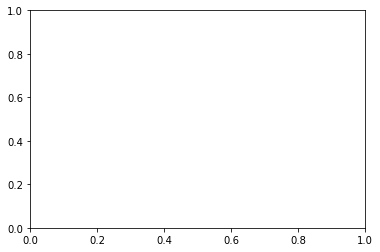

In [82]:
theta = np.arange(0,360,1)
plt.plot(phi,I)
#plt.savefig("ColumnDepth@Point_ColcaValley", bbox_inches='tight')

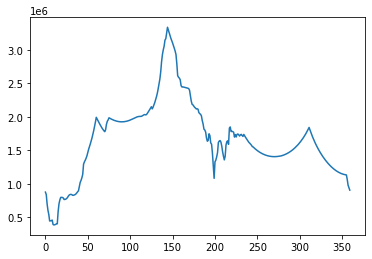

In [83]:
phi = np.arange(0,360,1)
plt.plot(phi,I_z)